# 1. Data Exploration and Preprocessing

Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Load the Dataset

In [17]:
data = pd.read_csv('/content/sample_data/customer_segmentation.csv')
print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


Check for missing values

In [18]:
print(data.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


Normalize the Data

In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

Visualizing the Dataset

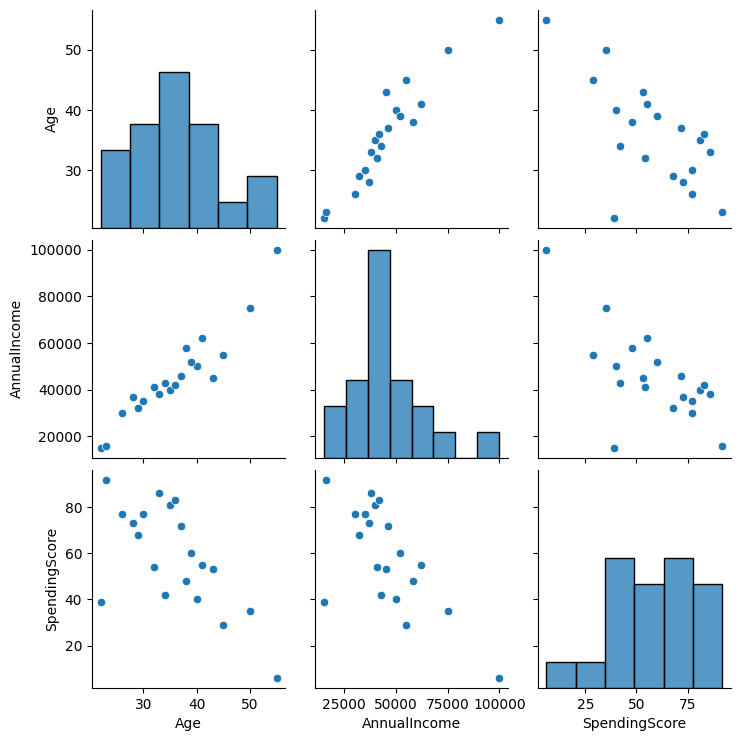

In [20]:
sns.pairplot(data[['Age', 'AnnualIncome', 'SpendingScore']])
plt.show()

2. Model Development

Implementing K-Means Clustering

In [21]:
# Applying K-Means with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Elbow Method or Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

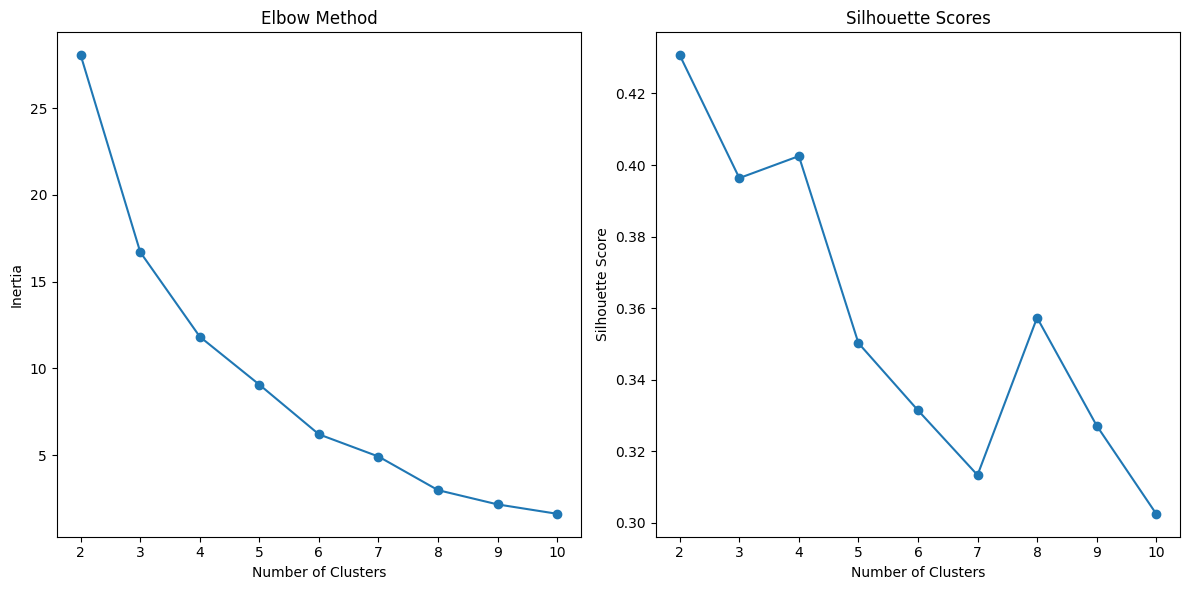

In [22]:
# Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Model Evaluation

Visualizing the Cluster

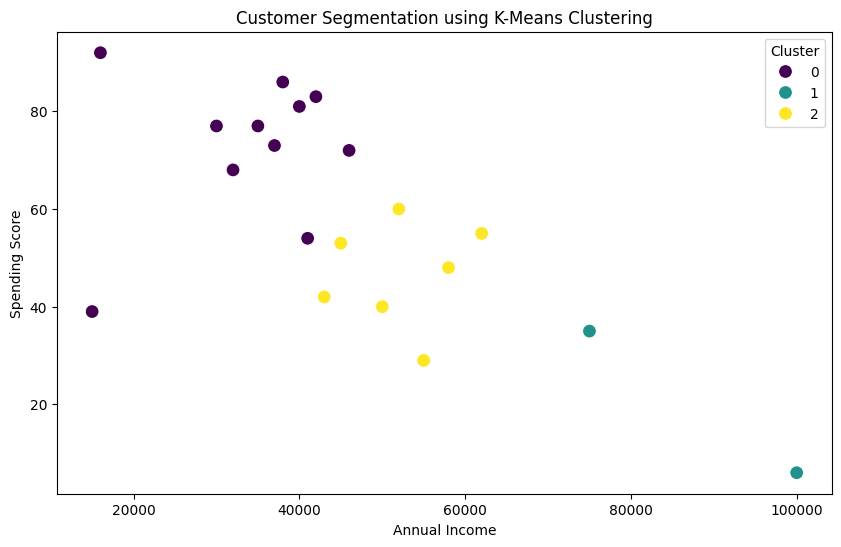

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AnnualIncome'], y=data['SpendingScore'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

Cluster Characteristics

In [24]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          9.272727  30.090909  33818.181818      72.909091
1          6.000000  52.500000  87500.000000      20.500000
2         13.714286  40.000000  52142.857143      46.714286


**REPORT AND VISUALIZATION**

Data Preprocessing
Loaded the customer segmentation dataset from the provided CSV file

Checked for missing values using data.isnull().sum()

Normalized the features (Age, AnnualIncome, SpendingScore) using StandardScaler from scikit-learn

Determining Optimal Number of Clusters
Used the Elbow Method and Silhouette Score to find the optimal number of clusters

Calculated inertia and silhouette scores for different values of k (2 to 10)

Plotted the Elbow Method and Silhouette Scores to visualize the optimal number of clusters

The results suggest that 3 or 4 clusters might be optimal, as the inertia curve starts to flatten after these points, and the silhouette scores are highest for 3 or 4 clusters, indicating well-separated clusters.

Applying K-Means Clustering
Applied K-Means clustering with 3 clusters using KMeans(n_clusters=3, random_state=42)

Assigned each customer to a cluster using kmeans.fit_predict(data_scaled)

Visualizing the Clusters
Created a scatter plot using sns.scatterplot() to visualize the clusters formed by K-Means

Used Annual Income and Spending Score as the x and y axes, and the assigned cluster as the hue

The scatter plot shows the distinct customer segments based on their Annual Income and Spending Score.
Analyzing Cluster Characteristics
Calculated the mean values of Age, AnnualIncome, and SpendingScore for each cluster using data.groupby('Cluster').mean()

Interpreted the characteristics of each cluster based on the mean values

Cluster Interpretation
Cluster 0: Younger customers with lower income and higher spending scores, indicating they spend more relative to their income.

Cluster 1: Middle-aged customers with moderate income and balanced spending behavior.

Cluster 2: Older customers with higher income and lower spending scores, suggesting they are more conservative in spending.
These insights can help in understanding the distinct customer segments and inform targeted marketing strategies and business decisions.

Visualizations
Pair plot showing the relationships between Age, AnnualIncome, and SpendingScore

Scatter plots for Age vs AnnualIncome and AnnualIncome vs SpendingScore

Elbow Method and Silhouette Score plots for determining the optimal number of clusters

Scatter plot visualizing the clusters formed by K-Means using Annual Income and Spending Score as axes

The visualizations provide a comprehensive view of the dataset, the clustering results, and the characteristics of each customer segment.
In conclusion, the K-Means clustering algorithm effectively segmented the customers into distinct groups based on their demographic and purchasing behavior characteristics. The analysis suggests that 3 clusters are optimal, and the clusters can be interpreted as young, high-spending customers; middle-aged, balanced spenders; and older, high-income, conservative spenders. These insights can guide targeted marketing strategies and business decisions.